In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Excel R\Data Science Assignments\Hierarical Clustering\crime_data.csv")

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.shape

(50, 5)

In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# 4 bussiness Moments 

In [43]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
Clusters      3.000
dtype: float64

In [44]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
Clusters       4.081633
dtype: float64

In [45]:
df.skew()

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
Clusters    0.123744
dtype: float64

In [46]:
df.kurt()

Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
Clusters   -1.154628
dtype: float64

# Pre-Processing of Data

In [6]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [7]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
df.value_counts()

Unnamed: 0      Murder  Assault  UrbanPop  Rape
Wyoming         6.8     161      60        15.6    1
Illinois        10.4    249      83        24.0    1
Minnesota       2.7     72       66        14.9    1
Michigan        12.1    255      74        35.1    1
Massachusetts   4.4     149      85        16.3    1
Maryland        11.3    300      67        27.8    1
Maine           2.1     83       51        7.8     1
Louisiana       15.4    249      66        22.2    1
Kentucky        9.7     109      52        16.3    1
Kansas          6.0     115      66        18.0    1
Iowa            2.2     56       57        11.3    1
Indiana         7.2     113      65        21.0    1
Idaho           2.6     120      54        14.2    1
Wisconsin       2.6     53       66        10.8    1
Hawaii          5.3     46       83        20.2    1
Georgia         17.4    211      60        25.8    1
Florida         15.4    335      80        31.9    1
Delaware        5.9     238      72        15.8    

In [9]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# Model Creation Using K-Means

Here we form clusters based on Distance it is the best way to Normalization while we are using the Distances Concept

In [15]:
#Normalization 
def nrml_df(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [18]:
normal_data=nrml_df(df.iloc[:,1:])
normal_data

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [12]:
from sklearn.cluster import KMeans

C:\Users\RaviKiran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


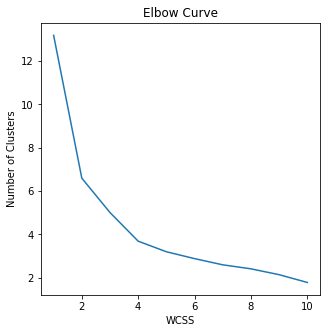

In [48]:
fig=plt.figure(figsize=(5,5))
plt.title("Elbow Curve")
WCSS=[]
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(normal_data)
    WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.xlabel("WCSS")
plt.ylabel("Number of Clusters")
plt.show()

In [ ]:
 We Assume that here k = 4 be the no of clusters 

In [49]:
model1=KMeans(n_clusters= 4)
model1.fit(normal_data)
pred=model1.labels_
pred

array([1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 3, 0, 2, 3, 2, 3, 1, 3, 0, 2, 0,
       3, 1, 2, 3, 3, 0, 3, 2, 0, 0, 1, 3, 2, 2, 2, 2, 2, 1, 3, 1, 0, 2,
       3, 2, 2, 3, 3, 2])

In [50]:
df['Clusters'] =model1.labels_

In [51]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,1


In [52]:
model1.cluster_centers_

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868]])

In [53]:
df.groupby('Clusters').agg(['mean']).reset_index

<bound method DataFrame.reset_index of              Murder     Assault   UrbanPop       Rape
               mean        mean       mean       mean
Clusters                                             
0         10.966667  264.000000  76.500000  33.608333
1         13.937500  243.625000  53.750000  21.412500
2          5.852941  141.176471  73.647059  19.335294
3          3.600000   78.538462  52.076923  12.176923>

In [54]:
model1.inertia_

3.683456153585915

here we usually use KMeans -Clustering for Larger Data Sets which are greter than (1000)records